In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [16]:
# orderlines_cl.csv
url = 'https://drive.google.com/file/d/1lrSr_vVbXN7QSVSScf68DpWwvCMclK5m/view?usp=sharing' 
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
orderlines = pd.read_csv(path)

# orders_cl.csv
url = 'https://drive.google.com/file/d/1cGjJ9o3vtwjK0Sohyr3YVTccXfnTPijT/view?usp=sharing' 
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
orders = pd.read_csv(path)

# brands_cl.csv
url = 'https://drive.google.com/file/d/1XGyabaa4mAkjixMk3XPgx_14OoSse3rs/view?usp=sharing' 
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
brands = pd.read_csv(path)

# products_cl.csv
url = 'https://drive.google.com/file/d/1rHC8M-HG13FtVncImXBydgDtIHyCPH0g/view?usp=sharing' 
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
products = pd.read_csv(path)

In [3]:
pd.options.display.float_format = '{:.2f}'.format

# New Challenges

We saw yesterday that the top 10 products for 2018 was composed of significantly more Apple products than the same top 10 for 2017. I'd like to investigate this business trend further.

In [28]:
orders['created_date'] = pd.to_datetime(orders['created_date'])
orderlines['date'] = pd.to_datetime(orderlines['date'])

## **Challenge 1:** 
Create a bar graph showing the total number of Apple products sold for each month

In [ ]:
products.head(3)

In [ ]:
orderlines.head(1)

In [ ]:
df = (
    orderlines.assign(year = orderlines['date'].dt.strftime('%Y'),
                      month = orderlines['date'].dt.strftime('%B'))
    .groupby(['month','year','sku']) 
    .agg({'product_quantity':'sum'}) 
    .reset_index() 
    .sort_values('product_quantity', ascending=False) 
    .groupby('month') 
    .head(10)
)
df

In [96]:
#products['name'].str.contains("Apple").sum()
df1= products.assign(apple = products['name'].str.contains("Apple")).query('apple == True')
df1
df_month = df.merge(df1, how='left')
df_month


,month,year,sku,product_quantity,name,desc,price,type,max_price_orderlines,apple
0,January,2018,MIC0036,2697,NaN,NaN,NaN,NaN,NaN,NaN
1,January,2018,APP1216,2447,Apple Magic Trackpad 2,Apple Wireless Bluetooth Trackpad.,149.00,1387,NaN,True
2,January,2018,APP0662,2252,IMac AppleCare Protection Plan,Apple Care extended warranty for iMac.,179.00,1231,NaN,True
3,December,2017,MIC0036,1627,NaN,NaN,NaN,NaN,NaN,NaN
4,December,2017,APP1216,1349,Apple Magic Trackpad 2,Apple Wireless Bluetooth Trackpad.,149.00,1387,NaN,True
...,...,...,...,...,...,...,...,...,...,...
115,June,2017,TRK0007,71,NaN,NaN,NaN,NaN,NaN,NaN
116,June,2017,APP1481,69,Apple iPhone 64GB Space Gray,New iPhone SE with 4-inch screen 64 free GB.,549.00,51601716,NaN,True
117,May,2017,APP0023,66,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59.00,13855401,NaN,True
118,June,2017,APP2089,66,"Apple iMac 27 ""Core i5 3.4Ghz 5K Retina | 8GB ...",IMac desktop computer 27 inch 5K Retina 8GB RA...,2105.59,"5,74E+15",NaN,True


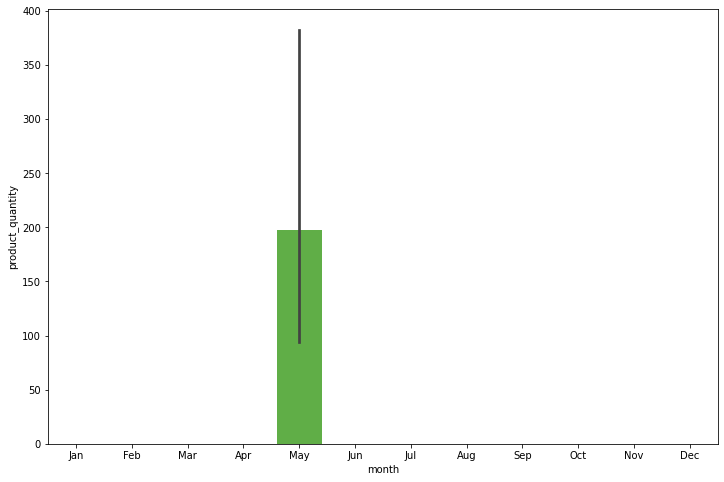

In [100]:
month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# define the size of the plot
# using matplotlib (plt), which operates together with seaborn
plt.subplots(figsize=(12, 8))

p = sns.barplot(
    data=df_month, # dataframe we will use to look for the columns information
    x='month', # x values on our chart
    y='product_quantity', # y values on our chart
    order=months # order x columns
)

## **Challenge 2:**
Continuing our theme of barplots - make a bar plot showing the amount of orders placed per hour. If we can see that more orders are placed at 3pm compared to 3am, we know when is best to do maintenance work on the servers

In [5]:
orders_place = orders.query('state == "Place Order"')
orders_place

,order_id,created_date,total_paid,state,check_orders
181,299553,2017-01-01 02:14:47,3278.99,Place Order,True
183,299555,2017-01-01 02:18:45,263.48,Place Order,True
208,299581,2017-01-01 08:52:28,757.77,Place Order,True
229,299602,2017-01-01 10:13:44,474.05,Place Order,True
232,299606,2017-01-01 10:40:34,429.00,Place Order,True
...,...,...,...,...,...
204675,527386,2018-03-14 13:49:48,161.00,Place Order,True
204683,527394,2018-03-14 13:55:15,161.00,Place Order,True
204685,527396,2018-03-14 13:55:44,141.58,Place Order,True
204686,527397,2018-03-14 13:56:38,42.99,Place Order,True


In [6]:
df = (
orders_place
.assign(hour = orders['created_date'].dt.strftime('%H %p'))
       .groupby(['hour']).agg({'order_id':'count'})
       .reset_index()
)
df

,hour,order_id
0,00 AM,1232
1,01 AM,685
2,02 AM,356
3,03 AM,197
4,04 AM,161
5,05 AM,102
6,06 AM,176
7,07 AM,367
8,08 AM,780
9,09 AM,1334


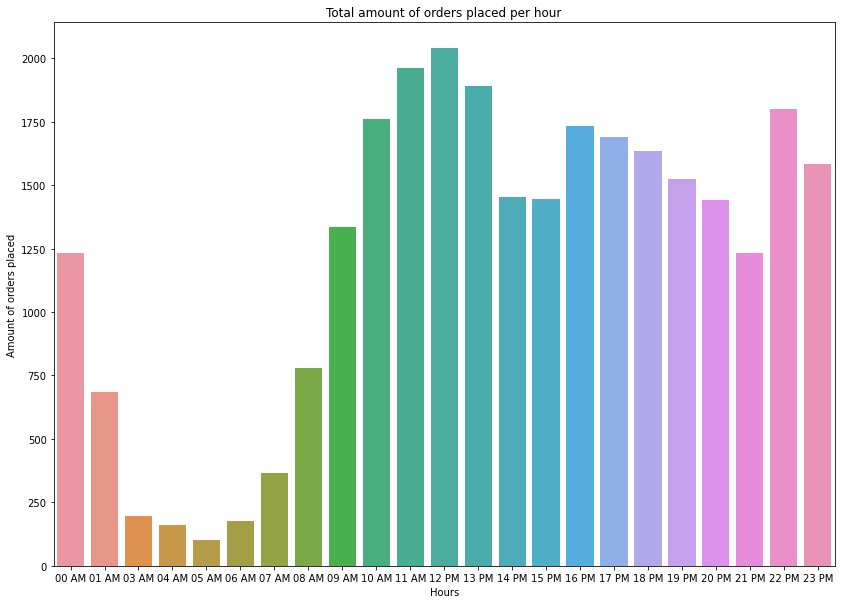

In [14]:
hours = ['00 AM', '01 AM','03 AM', '04 AM', '05 AM' ,'06 AM', '07 AM', '08 AM', '09 AM', '10 AM', '11 AM', '12 PM',
         '13 PM', '14 PM', '15 PM', '16 PM', '17 PM', '18 PM', '19 PM', '20 PM', '21 PM', '22 PM', '23 PM']


plt.subplots(figsize=(14, 10))

p = sns.barplot(
    data=df, # dataframe we will use to look for the columns information
    x='hour', # x values on our chart
    y='order_id', # y values on our chart
    order=hours) # order x columns

plt.ylim=(0,2250)
plt.xlabel('Hours') # x label name
plt.ylabel('Amount of orders placed') # y label name
plt.title('Total amount of orders placed per hour') # title
plt.ticklabel_format(style='plain', axis='y') # remove scientific notation for the y axis
plt.show() # show the plot

## **Challenge 3:**
Some items with same SKU have different unit_price for different orders
 
Create a boxplot of unit_price for 30 most frequently sold items

Use the orderlines table

## **Challenge 4:**
Show evolution of orders in different states (i.e. completed, cancelled etc...) for each month. Each state should have it's own line in different color

In [ ]:
orders.head()

In [209]:
df3 = (
orders
       .assign(month = orders['created_date'].dt.strftime('%Y-%m'))
       .groupby(['month','state']).agg({'state':'count'})
       .rename(columns={'state':'count'})
       #.reset_index()
)
df3

count
month   state                 
2017-01 Cancelled          531
        Completed         5111
        Pending            473
        Place Order       2564
        Shopping Basket   8410
...                        ...
2018-03 Cancelled          147
        Completed         1515
        Pending            482
        Place Order        854
        Shopping Basket   4403

[75 rows x 1 columns]

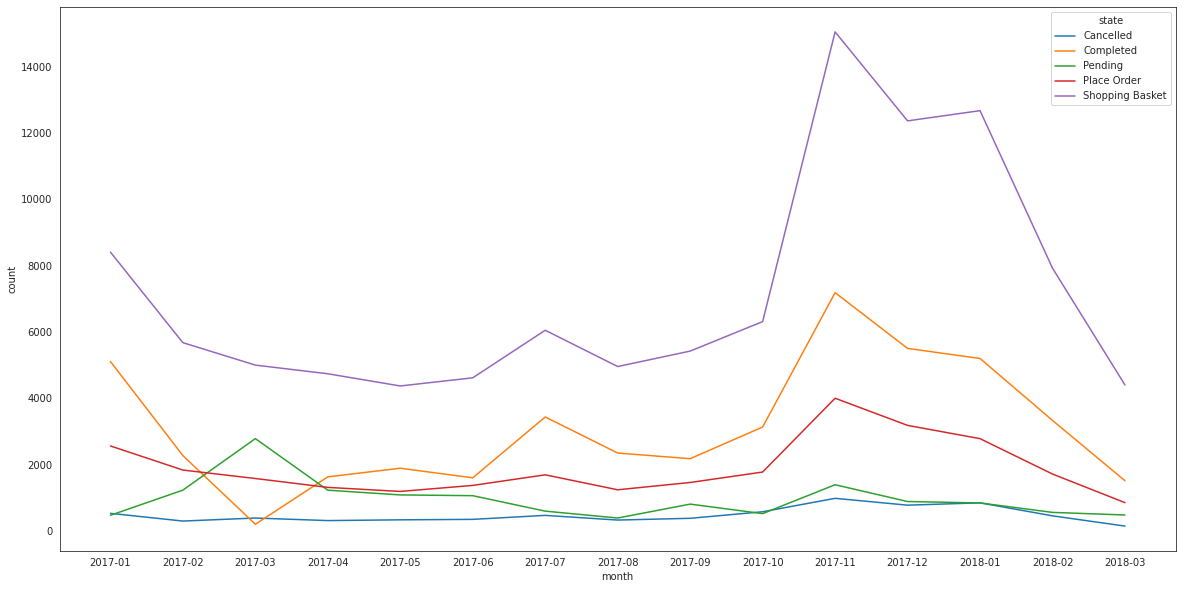

In [179]:
plt.figure(figsize=(20,10))
sns.lineplot(data=df3,x='month',y='count',hue='state');

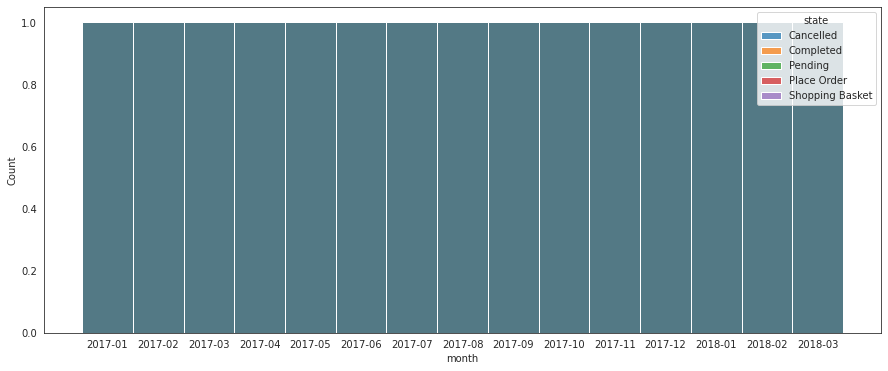

In [219]:
plt.subplots(figsize=(15, 6))

sns.histplot(data=df3, x='month', hue='state', 
             alpha=.7,
             bins=10 # define the number of bins the variable total paid will be grouped
            )